In [76]:
import pandas as pd
import matplotlib.pyplot as plt

descritions for data

https://ffiec.cfpb.gov/documentation/2018/lar-data-fields/

In [77]:
df = pd.read_csv('state_VA.csv', low_memory = False)

In [78]:
# drop columns that are same for all entries
df.drop('state_code',axis = 1,inplace = True)
df.drop('activity_year',axis = 1,inplace = True)
#drop columns that have more then 90% missing values
drop_thresh = df.shape[0]*.9
df = df.dropna(thresh=drop_thresh, how='all', axis='columns').copy()
# then remove rows that have empty values
df = df.dropna()

Response is action_taken
1 - Loan originated
2 - Application approved but not accepted
3 - Application denied
4 - Application withdrawn by applicant
5 - File closed for incompleteness
6 - Purchased loan
7 - Preapproval request denied
8 - Preapproval request approved but not accepted

In [79]:
df.describe()

,derived_msa-md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,737770.000000,737770.000000,7.377700e+05,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,...,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000
mean,48281.651219,51243.265286,5.124358e+10,2.111516,6.952446,1.993834,1.501056,20.763277,1.065531,12.386963,...,11.764372,13.717061,16.856874,5401.164746,34.704131,96618.568389,119.123599,1418.311353,1814.968637,31.467203
std,15602.163689,269.886997,2.697734e+08,1.590461,18.883489,0.078281,0.832933,14.239551,0.247461,106.823541,...,107.717893,107.548851,90.292359,2005.184348,20.467104,21647.070353,37.803906,599.113072,752.482831,14.964354
min,13980.000000,51001.000000,5.100109e+10,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,58100.000000,0.000000,0.000000,0.000000,0.000000
25%,44420.000000,51059.000000,5.105948e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,10.000000,3950.000000,17.880000,78800.000000,92.000000,1008.000000,1316.000000,21.000000
50%,47894.000000,51107.000000,5.110761e+10,1.000000,1.000000,2.000000,1.000000,31.000000,1.000000,2.000000,...,1.000000,2.000000,10.000000,5280.000000,32.070000,84900.000000,116.000000,1360.000000,1744.000000,30.000000
75%,47894.000000,51199.000000,5.119905e+10,3.000000,3.000000,2.000000,2.000000,31.000000,1.000000,2.000000,...,1.000000,6.000000,10.000000,6618.000000,47.880000,118700.000000,143.000000,1781.000000,2236.000000,40.000000
max,99999.000000,51840.000000,5.184000e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,15068.000000,100.000000,118700.000000,315.000000,3985.000000,4881.000000,76.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737770 entries, 0 to 822453
Data columns (total 59 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   lei                                       737770 non-null  object 
 1   derived_msa-md                            737770 non-null  int64  
 2   county_code                               737770 non-null  float64
 3   census_tract                              737770 non-null  float64
 4   conforming_loan_limit                     737770 non-null  object 
 5   derived_loan_product_type                 737770 non-null  object 
 6   derived_dwelling_category                 737770 non-null  object 
 7   derived_ethnicity                         737770 non-null  object 
 8   derived_race                              737770 non-null  object 
 9   derived_sex                               737770 non-null  object 
 10  action_taken        

In [81]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

1 - Loan originated  (means it was accpected and taken)

2 - Application approved but not accepted

3 - Application denied

4 - Application withdrawn by applicant

5 - File closed for incompleteness

6 - Purchased loan

7 - Preapproval request denied

8 - Preapproval request approved but not accepted

In [82]:
df['applicant_race-1'].value_counts()

5.0     444587
6.0     136374
3.0      74728
2.0      56857
7.0      10734
21.0      4990
1.0       4084
4.0       1382
27.0      1354
23.0       808
25.0       551
26.0       471
22.0       454
44.0       242
24.0        79
42.0        33
41.0        28
43.0        14
Name: applicant_race-1, dtype: int64

In [83]:
lookup_action_taken = {1:'Loan originated', 2: 'Application approved but not accepted',3:'Application denied',
            4:'Application withdrawn by applicant',5:'File closed for incompleteness',6:'Purchased loan',7:'Preapproval request denied',8:"Preapproval request approved but not accepted"}
print(df.action_taken.map(lookup_action_taken).value_counts())
print(df.action_taken.value_counts())

Loan originated                                  464207
Application withdrawn by applicant               107258
Application denied                                76131
File closed for incompleteness                    39462
Purchased loan                                    34148
Application approved but not accepted             16401
Preapproval request denied                          123
Preapproval request approved but not accepted        40
Name: action_taken, dtype: int64
1    464207
4    107258
3     76131
5     39462
6     34148
2     16401
7       123
8        40
Name: action_taken, dtype: int64


In [84]:
#create a new dataframe where the only values are those that got accepted or denied
dfd = df[(df['action_taken']==1) | (df['action_taken']==3)]

In [85]:
dfd['applicant_race-1'].value_counts()

5.0     337512
6.0      96273
3.0      54961
2.0      41432
21.0      3327
1.0       2946
4.0       1040
27.0       942
23.0       553
25.0       370
26.0       322
22.0       314
44.0       180
7.0         62
24.0        54
42.0        21
41.0        19
43.0        10
Name: applicant_race-1, dtype: int64

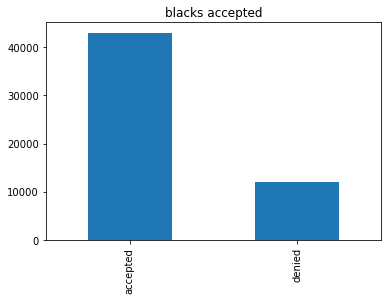

In [86]:
dfd[dfd['applicant_race-1']==3].action_taken.value_counts().plot.bar(stacked=True)
plt.title("blacks accepted")
plt.xticks([0,1],["accepted",'denied'])
plt.show()


In [96]:
dfd['counter'] = 1

C:\Users\antpr\AppData\Local\Temp/ipykernel_35072/1005388321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['counter'] = 1


<AxesSubplot:xlabel='applicant_race-1'>

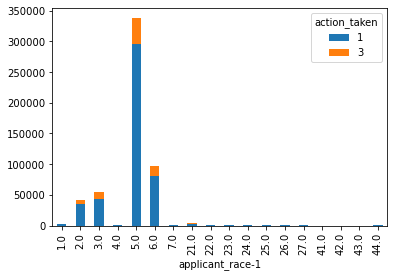

In [102]:

s = (dfd.pivot_table(columns='action_taken', index='applicant_race-1', values='counter', aggfunc='count'))
s.plot.bar(stacked=True)